In [2]:
import pandas as pd
import numpy as np
import pickle

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  
from imblearn.combine import SMOTETomek


from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
df = pd.read_csv("datos/creditcardmarketing.csv")
df.head()

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [4]:
col = ["Customer_Number","Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Q1","Q2","Q3","Q4","Balance"]
df.columns = col

In [5]:
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,17999.0,9001.000000,5196.008083,2.00,4501.5,9001.0,13500.500,18000.00
Bank_Accounts_Open,17999.0,1.255792,0.472510,1.00,1.0,1.0,1.000,3.00
Credit_Cards_Held,17999.0,1.903495,0.797031,1.00,1.0,2.0,2.000,4.00
Homes_Owned,17999.0,1.203456,0.427350,1.00,1.0,1.0,1.000,3.00
Household_Size,17999.0,3.499028,1.114207,1.00,3.0,3.0,4.000,9.00
Q1,17975.0,940.503310,350.303729,48.25,787.5,1007.0,1153.125,3366.25
Q2,17975.0,910.408456,620.068494,0.00,392.5,772.0,1521.000,3450.00
Q3,17975.0,999.398999,457.414081,0.00,663.0,1032.0,1342.000,3421.00
Q4,17975.0,1042.030654,553.467854,0.00,633.0,945.0,1463.000,3823.00
Balance,17975.0,810.175132,559.015084,0.00,363.0,703.0,1212.000,4215.00


In [7]:
df["Credit_Rating"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [8]:
df.dtypes

Customer_Number           int64
Offer_Accepted           object
Reward                   object
Mailer_Type              object
Income_Level             object
Bank_Accounts_Open        int64
Overdraft_Protection     object
Credit_Rating            object
Credit_Cards_Held         int64
Homes_Owned               int64
Household_Size            int64
Own_Your_Home            object
Q1                      float64
Q2                      float64
Q3                      float64
Q4                      float64
Balance                 float64
dtype: object

In [9]:
(df.isnull().sum()*100/df.shape[0])

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
Q1                      0.133341
Q2                      0.133341
Q3                      0.133341
Q4                      0.133341
Balance                 0.133341
dtype: float64

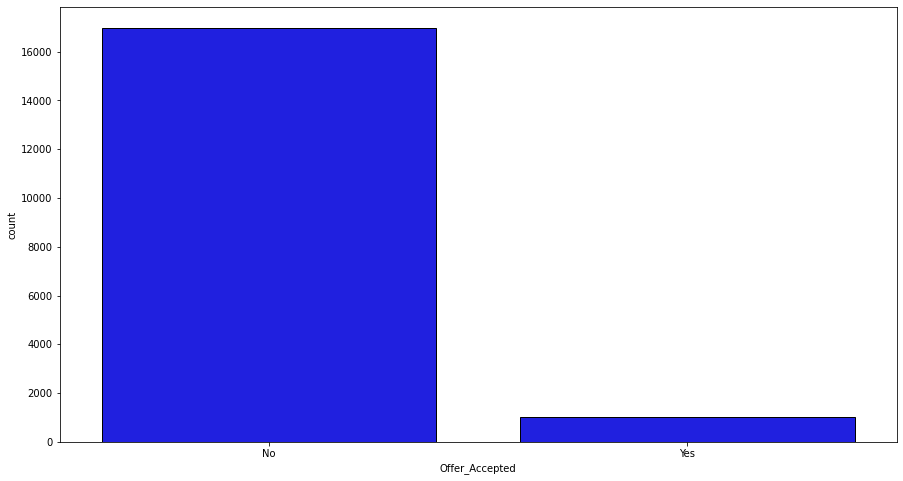

In [10]:
plt.figure(figsize=(15,8)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Offer_Accepted",  color = "blue",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

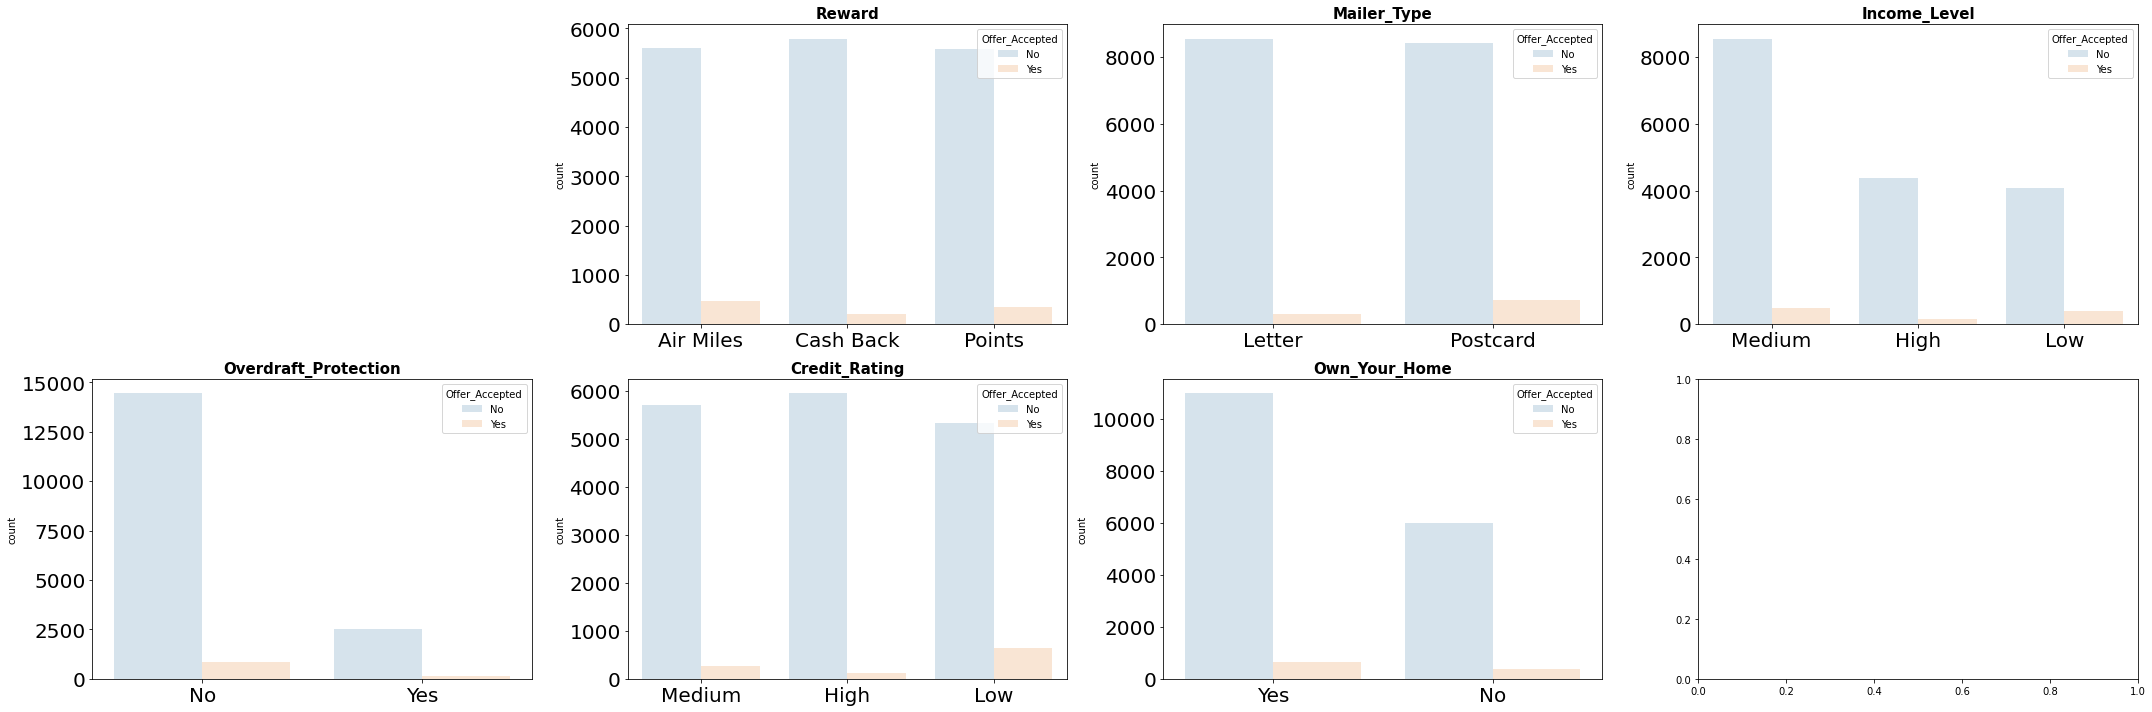

In [11]:


fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))


axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Offer_Accepted",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[0])
fig.tight_layout();

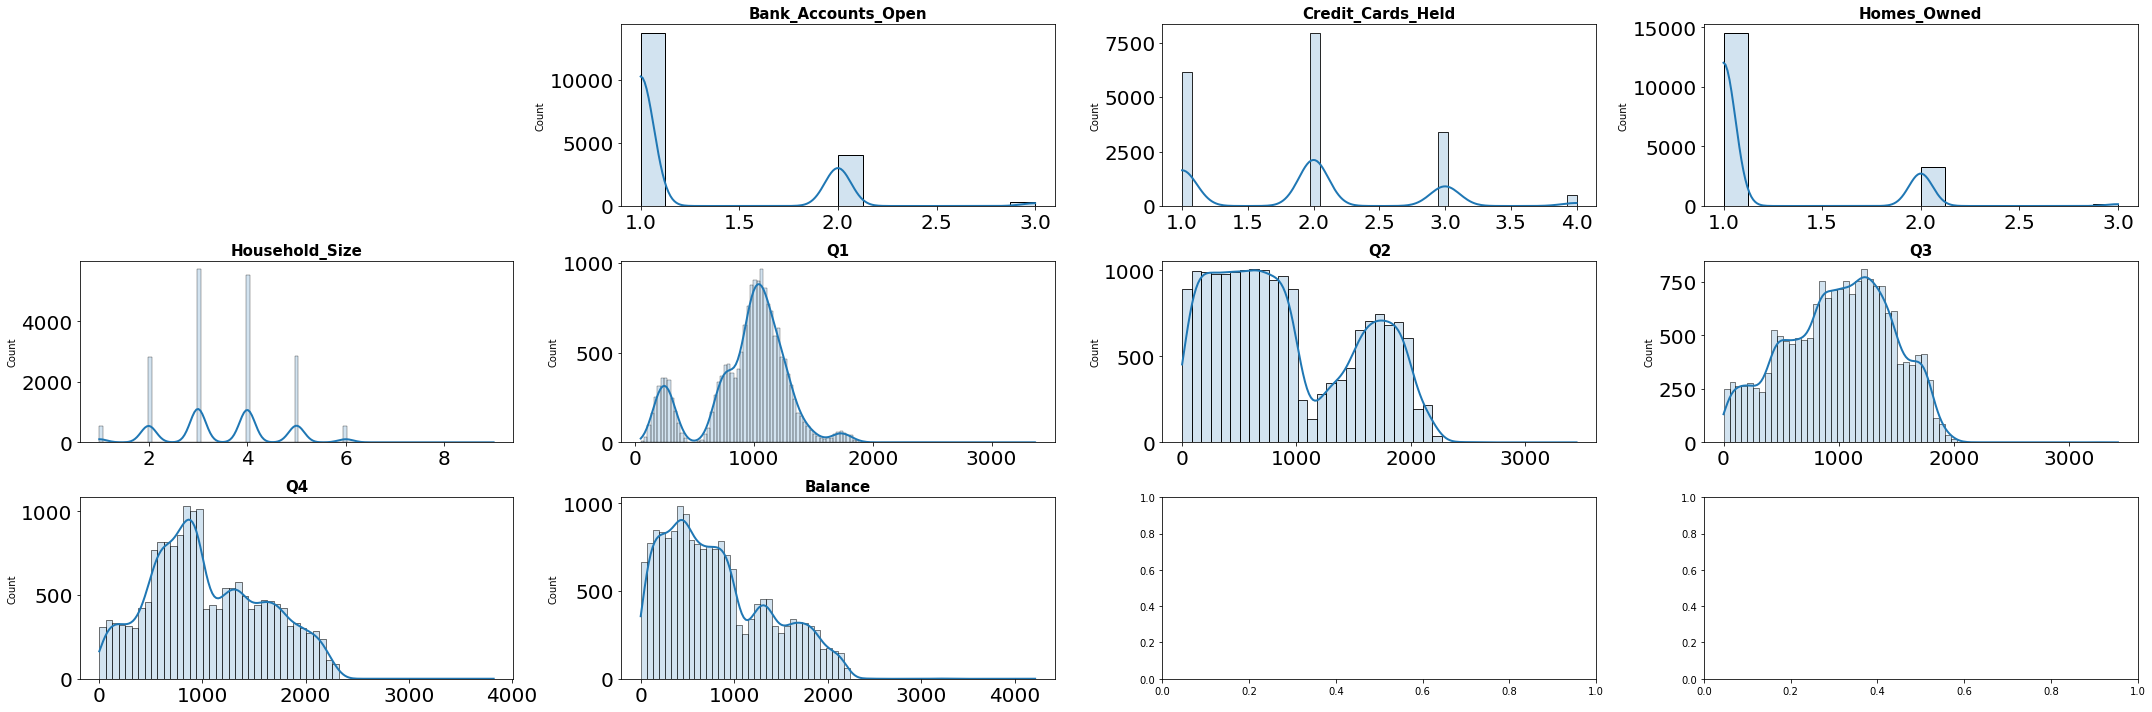

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

# lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.delaxes(axes[0])

fig.tight_layout()

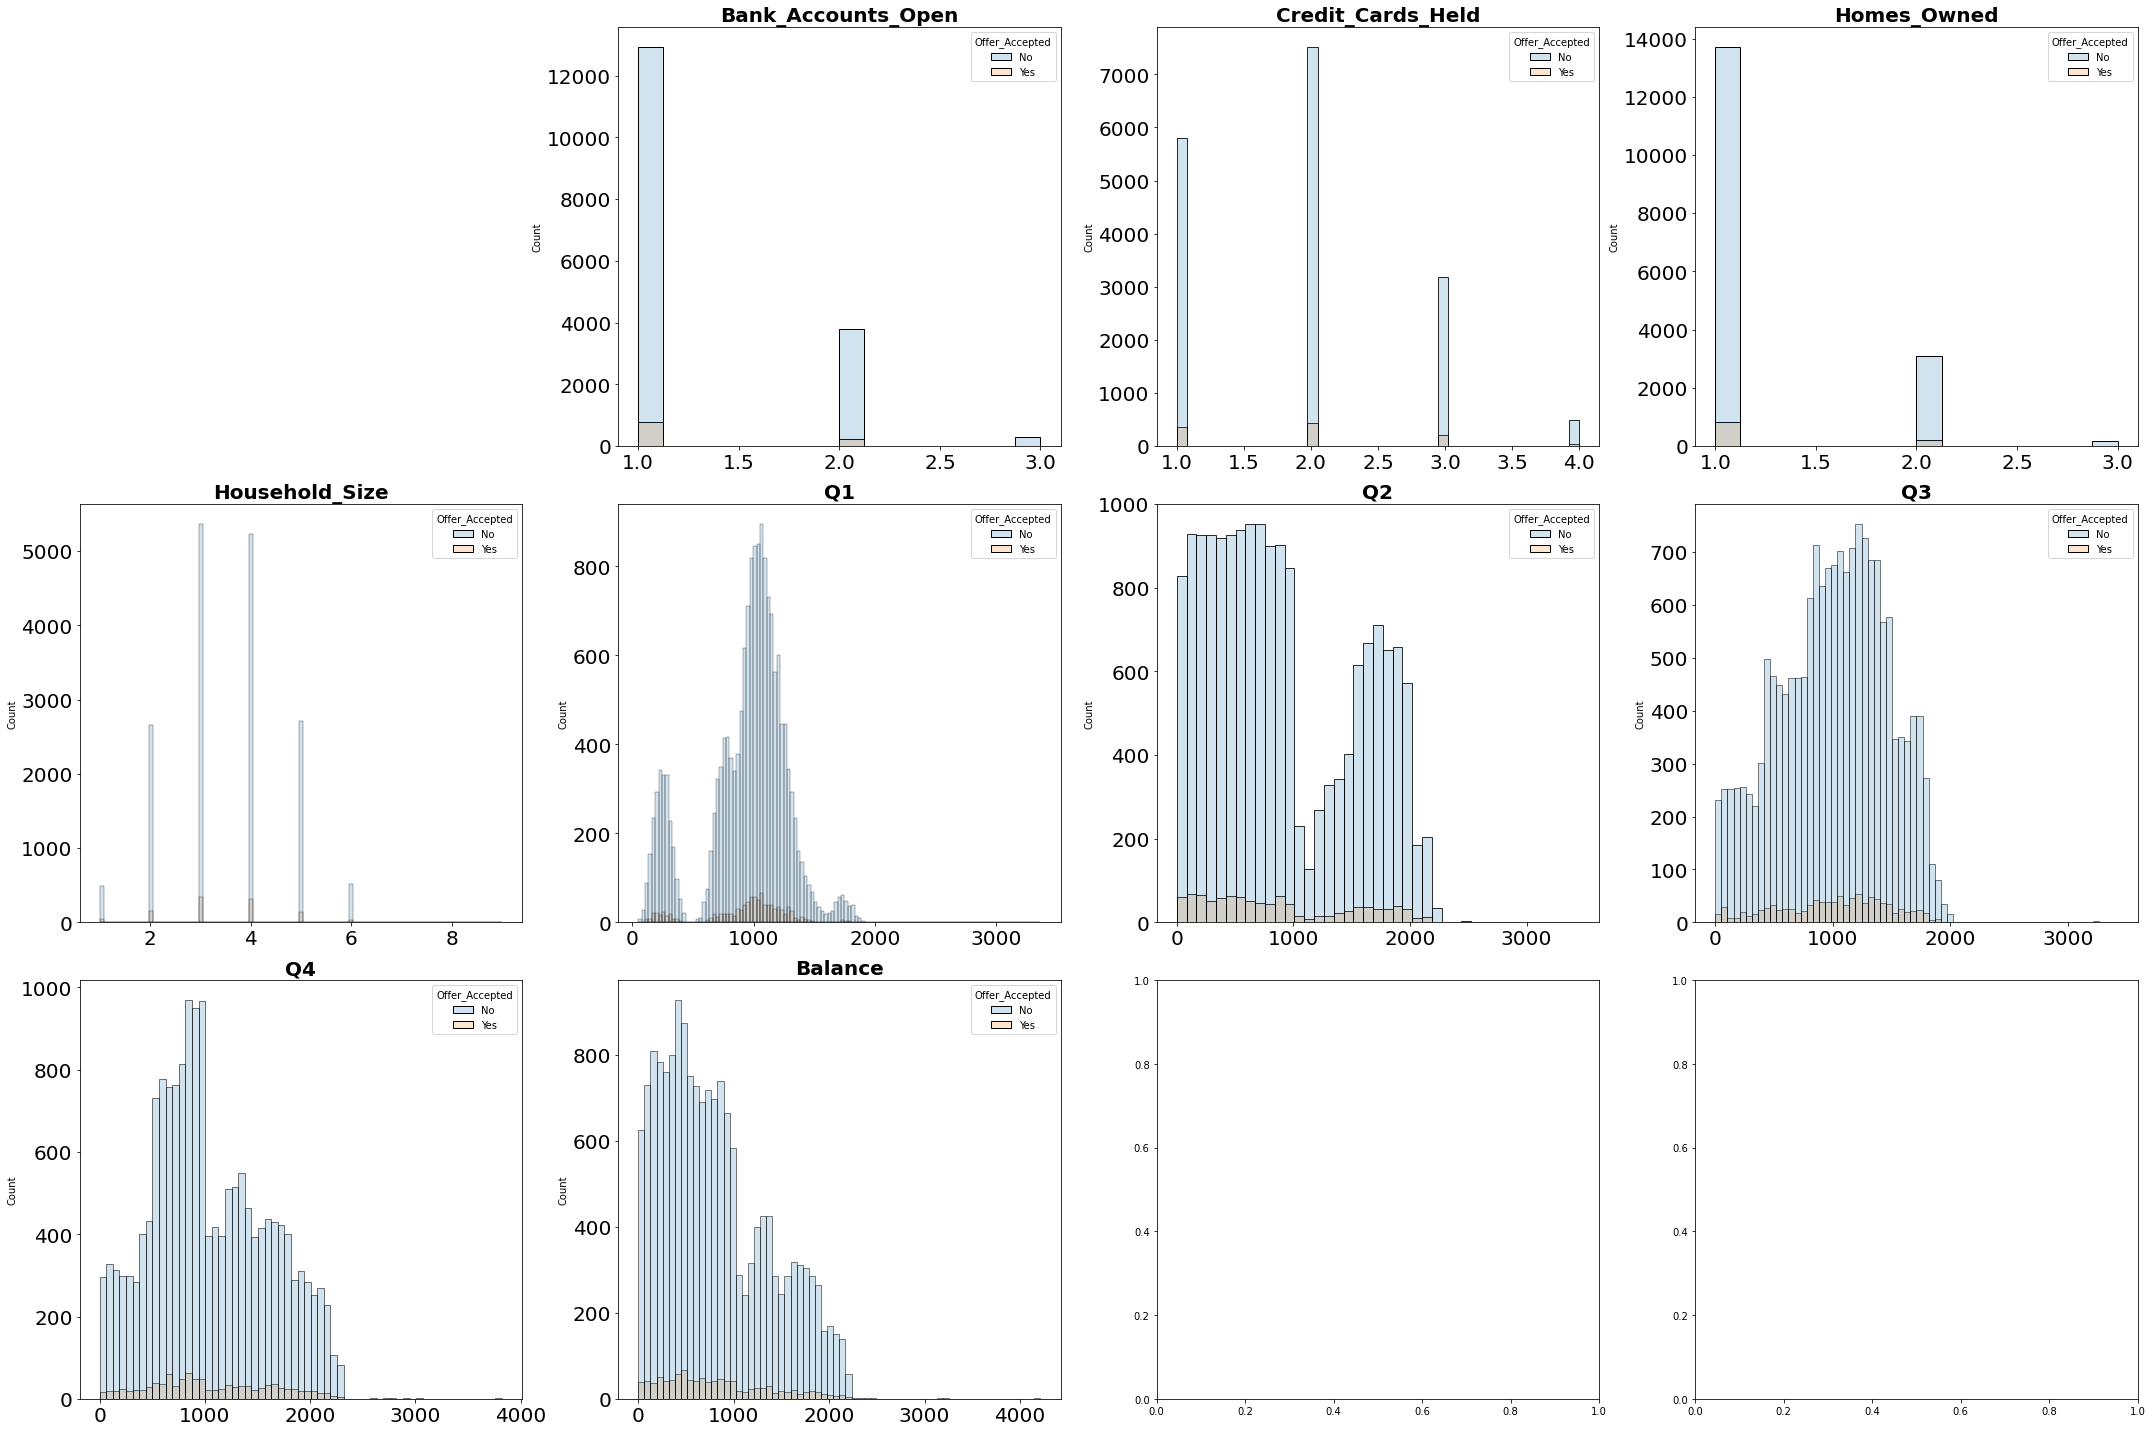

In [13]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 20))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "Offer_Accepted", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.delaxes(axes[0])

fig.tight_layout();

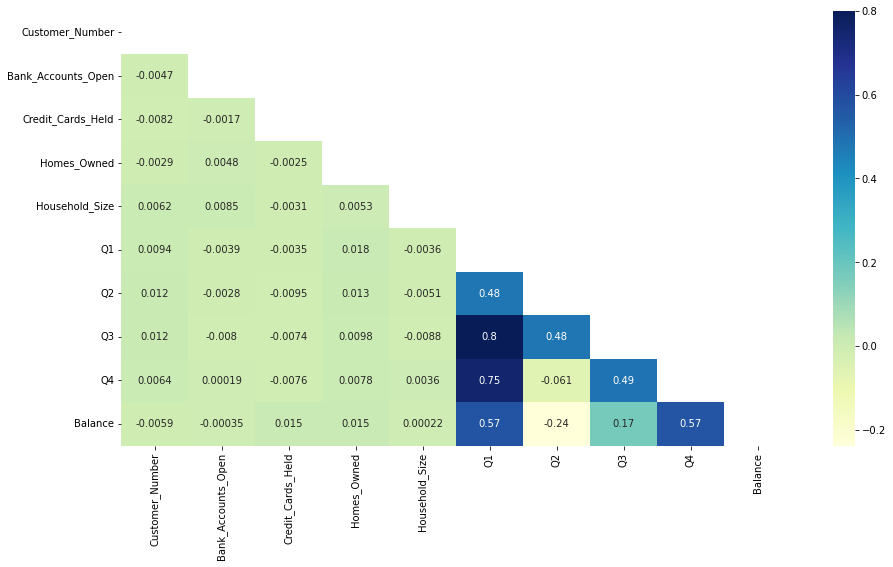

In [14]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

<h2>Nulos</h2>

In [15]:
df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Q1                      24
Q2                      24
Q3                      24
Q4                      24
Balance                 24
dtype: int64

In [16]:
for i in df.columns[-5:]:
    df[i].replace(np.nan, df[i].median(), inplace = True)

In [17]:
df.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
Q1                      0
Q2                      0
Q3                      0
Q4                      0
Balance                 0
dtype: int64

<h2>Outliers</h2>

In [18]:
df_numericas = df.select_dtypes(include = np.number)#.drop("Offer_Accepted", axis = 1)
df_numericas.head()

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Q1,Q2,Q3,Q4,Balance
0,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
1,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,6,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0


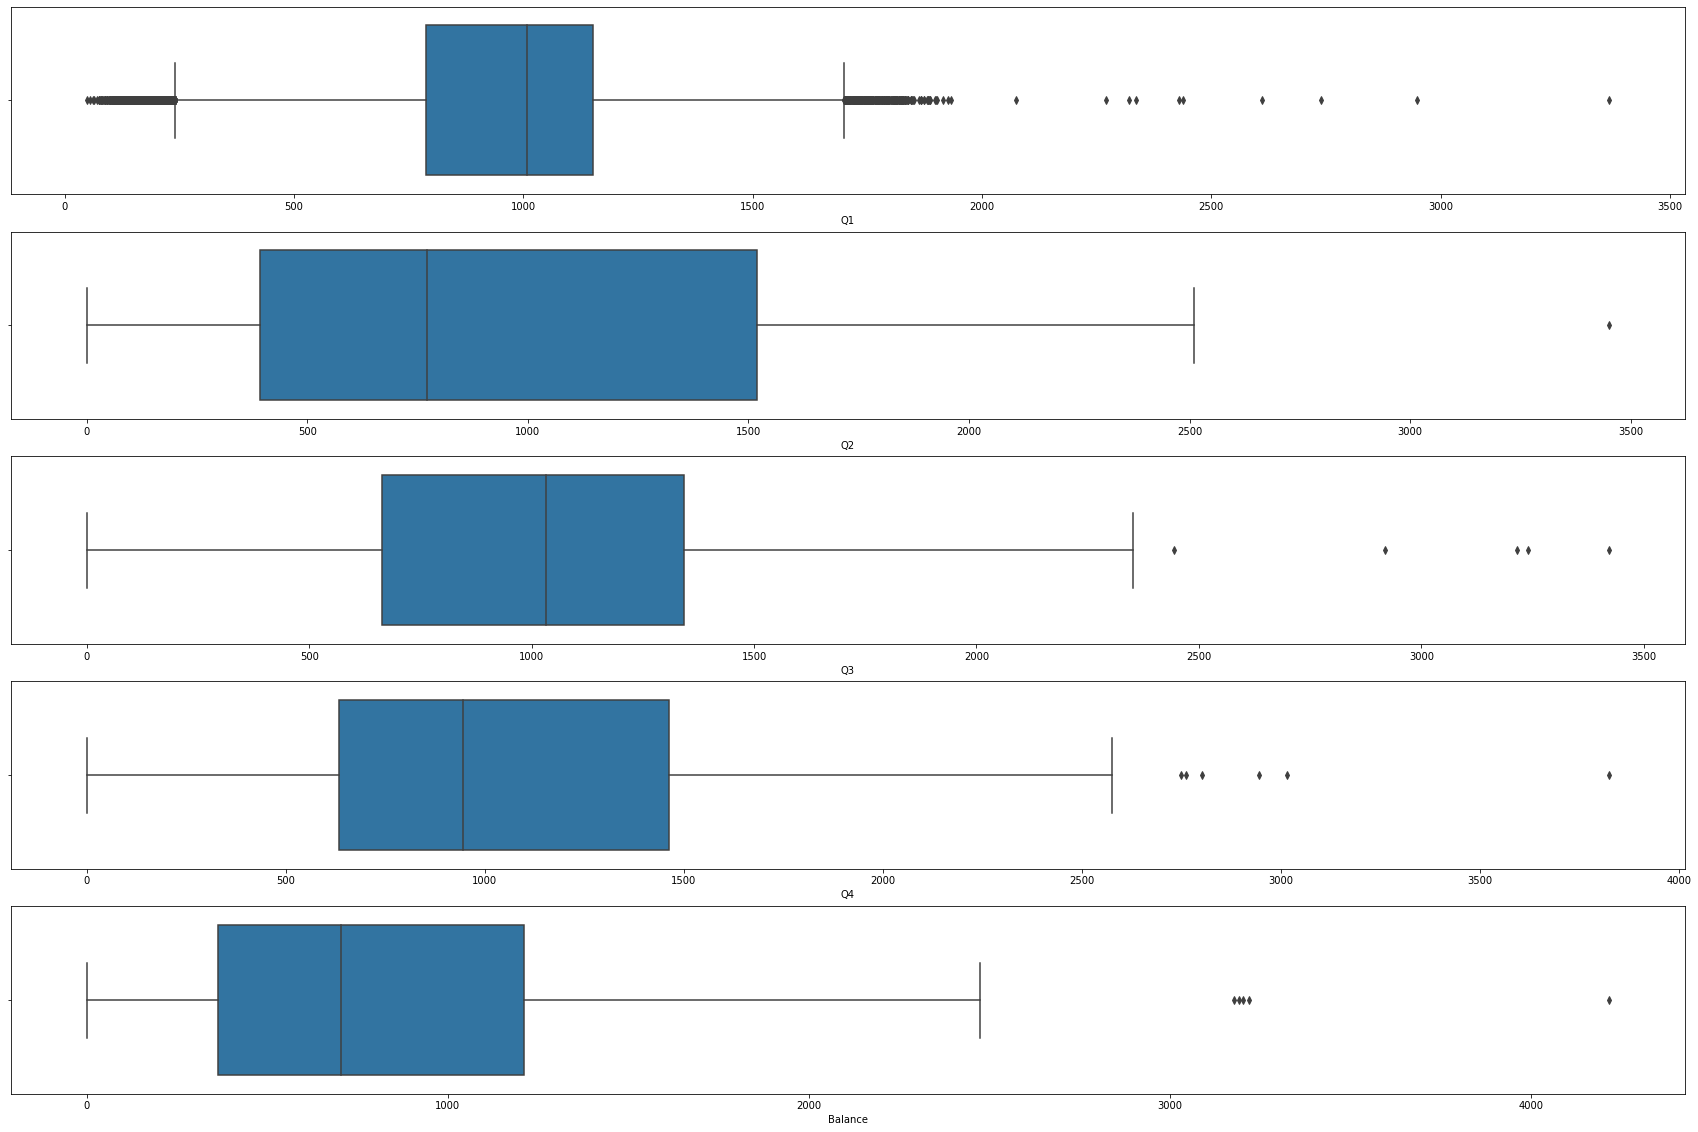

In [19]:
fig, ax = plt.subplots(5, 1, figsize=(30,20))

df_number = df_numericas[["Q1", "Q2", "Q3", "Q4", "Balance"]]

for i in range(len(df_number.columns)):
    sns.boxplot(x = df_number.columns[i], data = df_number, ax = ax[i])
plt.show()

In [77]:
def detectar_outliers_t(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [78]:
out_num = df_number[["Q1","Q2", "Q3", "Q4", "Balance"]]

In [79]:
indice = detectar_outliers_t(out_num, df)
print(indice)

{'Q1': [0, 21, 40, 78, 90, 97, 100, 133, 135, 148, 179, 180, 181, 182, 195, 197, 199, 213, 215, 236, 241, 253, 260, 278, 287, 291, 313, 333, 341, 344, 379, 381, 420, 429, 440, 453, 459, 516, 520, 526, 539, 567, 590, 596, 604, 606, 635, 640, 648, 660, 668, 685, 715, 763, 766, 775, 801, 822, 827, 838, 839, 840, 860, 869, 891, 893, 905, 921, 927, 942, 979, 981, 985, 994, 1026, 1043, 1051, 1054, 1074, 1076, 1079, 1089, 1095, 1106, 1119, 1133, 1134, 1137, 1139, 1147, 1150, 1155, 1163, 1186, 1192, 1211, 1215, 1233, 1253, 1254, 1257, 1261, 1268, 1282, 1286, 1291, 1295, 1311, 1330, 1338, 1364, 1380, 1391, 1396, 1397, 1398, 1399, 1403, 1404, 1408, 1414, 1418, 1423, 1425, 1430, 1438, 1483, 1487, 1494, 1501, 1514, 1516, 1524, 1547, 1558, 1561, 1572, 1577, 1578, 1585, 1586, 1605, 1608, 1620, 1622, 1629, 1634, 1638, 1660, 1684, 1686, 1700, 1714, 1715, 1742, 1772, 1781, 1784, 1810, 1832, 1839, 1843, 1856, 1872, 1880, 1884, 1914, 1915, 1919, 1966, 1970, 1972, 1976, 2000, 2013, 2020, 2027, 2033, 2034,

In [80]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in indice.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana 

In [24]:
def detectar_outliers_a(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 2 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [25]:
out_num2 = df_number[["Q1"]]
indice2 = detectar_outliers_a(out_num2, df)
print(indice2)

{'Q1': [1476, 2295, 2654, 2791, 3526, 5295, 5709, 5969, 7254, 8776, 8886, 9386, 9434, 9440, 10474, 10575, 12634, 14002, 14030, 15258, 15607, 15753, 17735]}


In [26]:
for k, v in indice2.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana 

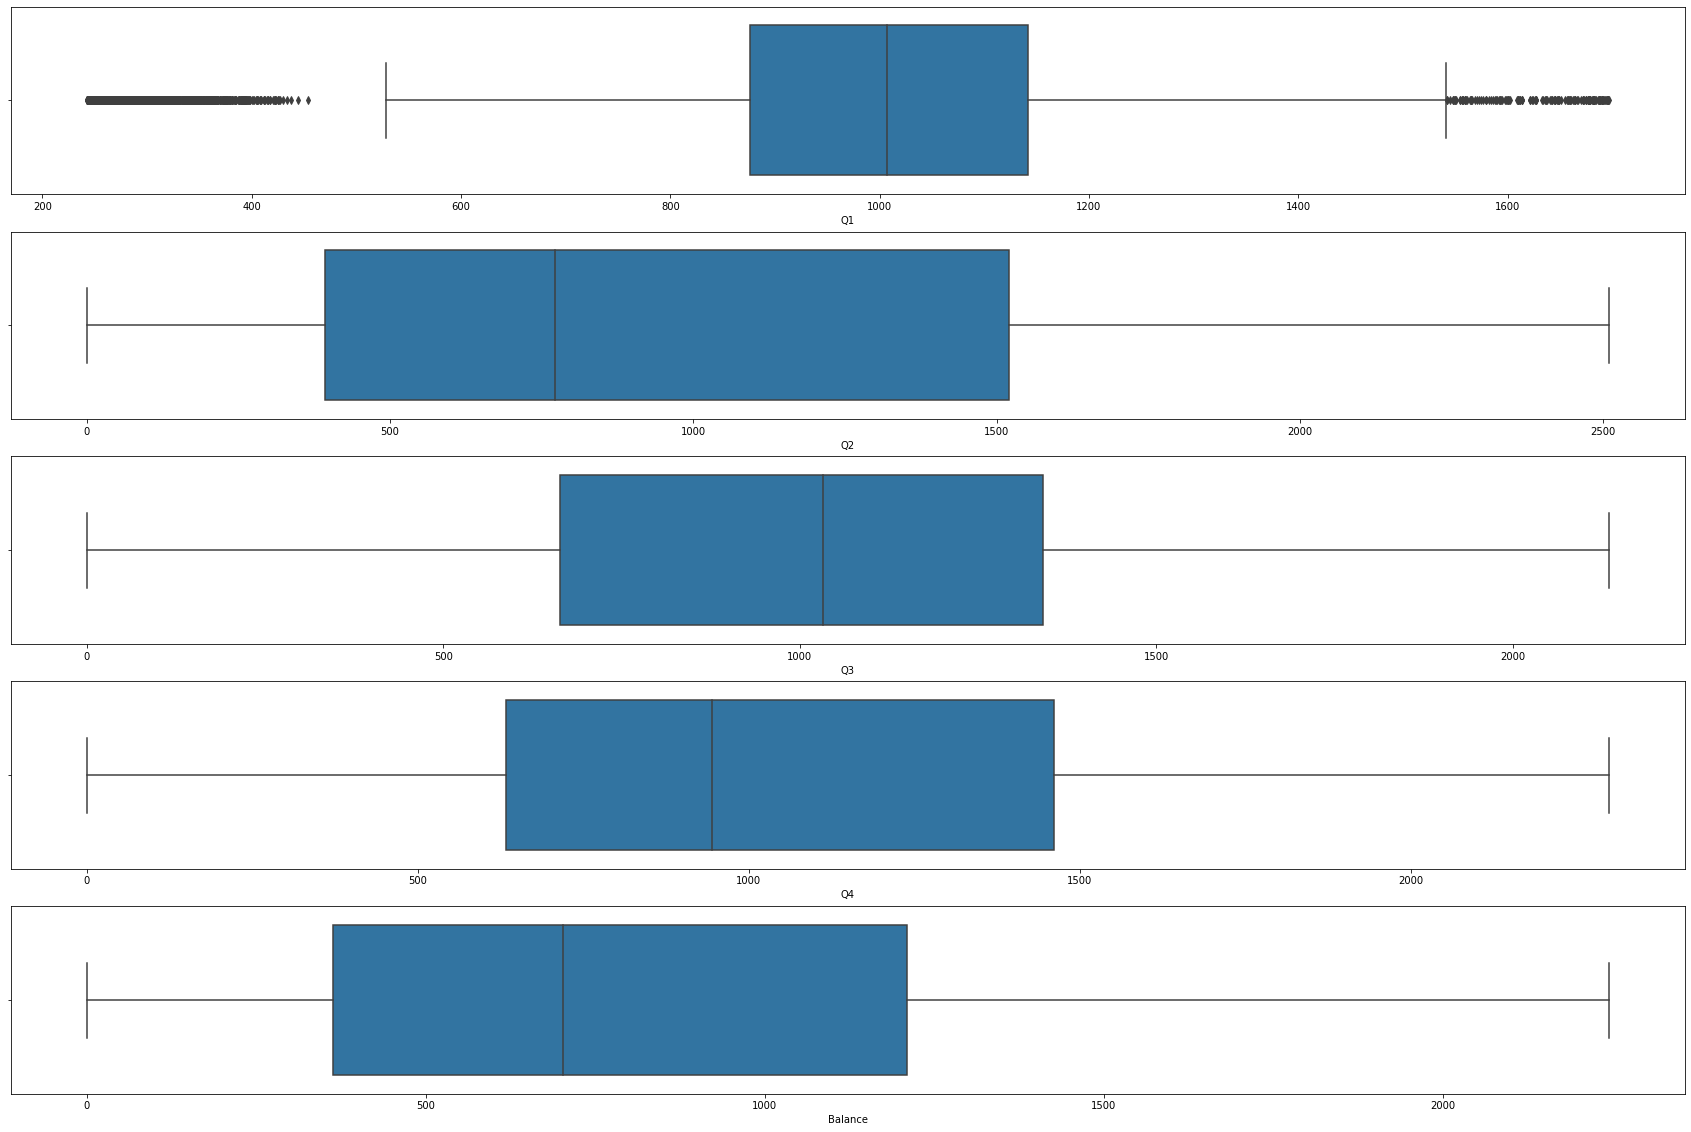

In [81]:
fig, ax = plt.subplots(5, 1, figsize=(30,20))

df_number = df[["Q1", "Q2", "Q3", "Q4", "Balance"]]

for i in range(len(df_number.columns)):
    sns.boxplot(x = df_number.columns[i], data = df_number, ax = ax[i])
plt.show()

<h2>Estandarización</h2>

In [82]:
df.select_dtypes(include=np.number).columns

Index(['Customer_Number', 'Bank_Accounts_Open', 'Credit_Cards_Held',
       'Homes_Owned', 'Household_Size', 'Q1', 'Q2', 'Q3', 'Q4', 'Balance'],
      dtype='object')

In [147]:
df_prueba = df.copy()

In [148]:
scaler = StandardScaler()
scaler.fit(df_prueba[['Customer_Number', 'Bank_Accounts_Open', 'Credit_Cards_Held',
            'Homes_Owned', 'Household_Size', 'Q1', 'Q2', 'Q3', 'Q4', 'Balance']])
X_escaladas = scaler.transform(df_prueba[['Customer_Number', 'Bank_Accounts_Open', 'Credit_Cards_Held',
            'Homes_Owned', 'Household_Size', 'Q1', 'Q2', 'Q3', 'Q4', 'Balance']])
df_prueba[['Customer_Number', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size', 'Q1', 'Q2', 'Q3', 'Q4', 'Balance']] = X_escaladas
df_prueba.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,-1.731955,No,Air Miles,Letter,Medium,-0.541362,No,Medium,0.121084,1.863966,1.347159,Yes,0.089965,-1.406389,-1.959567,-1.745539,-0.795982
1,-1.731762,No,Air Miles,Postcard,High,1.575054,No,Medium,0.121084,-0.476100,-1.345414,Yes,-2.658672,-0.876819,-1.419598,-1.624110,-1.018832
2,-1.731570,No,Air Miles,Letter,Medium,1.575054,No,High,-1.133607,-0.476100,0.449635,No,0.887653,1.078394,1.670958,0.141148,-0.700731
3,-1.731377,No,Air Miles,Letter,Medium,-0.541362,No,Medium,0.121084,-0.476100,2.244684,Yes,0.857552,1.985768,0.786374,-0.107148,-0.797779
4,-1.731185,No,Air Miles,Letter,Medium,-0.541362,No,High,1.375776,-0.476100,0.449635,No,0.495394,1.512707,0.803934,-0.527620,-0.560551


In [149]:
with open('datos/estandar.pkl', 'wb') as s:
    pickle.dump(scaler, s)

In [150]:
df.select_dtypes(include=np.object0).columns

Index(['Offer_Accepted', 'Reward', 'Mailer_Type', 'Income_Level',
       'Overdraft_Protection', 'Credit_Rating', 'Own_Your_Home'],
      dtype='object')

<h2>Encoding</h2>

In [151]:

print('Acepta la targeta tine', df['Offer_Accepted'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")
print('Tipo de programa de recompensa tine', df['Reward'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")
print('Tipo de correspondencia tine', df['Mailer_Type'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")
print('Nivel de ingresos tine', df['Income_Level'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")
print('Protección contra sobregiros tine', df['Overdraft_Protection'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")
print('Calificación crediticia tine', df['Credit_Rating'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")
print('Es propietario de su hogar tine', df['Own_Your_Home'].unique(), 'categorias')
print("--------------------------------------------------------------------------------------\n")


Acepta la targeta tine ['No' 'Yes'] categorias
--------------------------------------------------------------------------------------

Tipo de programa de recompensa tine ['Air Miles' 'Cash Back' 'Points'] categorias
--------------------------------------------------------------------------------------

Tipo de correspondencia tine ['Letter' 'Postcard'] categorias
--------------------------------------------------------------------------------------

Nivel de ingresos tine ['Medium' 'High' 'Low'] categorias
--------------------------------------------------------------------------------------

Protección contra sobregiros tine ['No' 'Yes'] categorias
--------------------------------------------------------------------------------------

Calificación crediticia tine ['Medium' 'High' 'Low'] categorias
--------------------------------------------------------------------------------------

Es propietario de su hogar tine ['Yes' 'No'] categorias
---------------------------------------------

In [152]:
orden_targeta = ["No", "Yes"]
orden_programa = ['Cash Back', 'Points', 'Air Miles']
orden_correo = ['Letter', 'Postcard']
orden_ingresos = ['High', 'Low', 'Medium']
orden_protecion = ['Yes', 'No']
orden_credito = ['High', 'Medium', 'Low']
orden_prop = ['No', 'Yes'] 

In [153]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'datos/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df

In [154]:
df_col = ordinal_encoder(orden_targeta, df_prueba, "Offer_Accepted")
df_col = ordinal_encoder(orden_programa, df_prueba, "Reward")
df_col = ordinal_encoder(orden_correo, df_prueba, "Mailer_Type")
df_col = ordinal_encoder(orden_ingresos, df_prueba, "Income_Level")
df_col = ordinal_encoder(orden_protecion, df_prueba, "Overdraft_Protection")
df_col = ordinal_encoder(orden_credito, df_prueba, "Credit_Rating")
df_col = ordinal_encoder(orden_prop, df_prueba, "Own_Your_Home")
df_col.head()


,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,-1.731955,0,2,0,2,-0.541362,1,1,0.121084,1.863966,1.347159,1,0.089965,-1.406389,-1.959567,-1.745539,-0.795982
1,-1.731762,0,2,1,0,1.575054,1,1,0.121084,-0.476100,-1.345414,1,-2.658672,-0.876819,-1.419598,-1.624110,-1.018832
2,-1.731570,0,2,0,2,1.575054,1,0,-1.133607,-0.476100,0.449635,0,0.887653,1.078394,1.670958,0.141148,-0.700731
3,-1.731377,0,2,0,2,-0.541362,1,1,0.121084,-0.476100,2.244684,1,0.857552,1.985768,0.786374,-0.107148,-0.797779
4,-1.731185,0,2,0,2,-0.541362,1,0,1.375776,-0.476100,0.449635,0,0.495394,1.512707,0.803934,-0.527620,-0.560551


In [155]:
df_col.to_csv("datos/credit-purub.csv")

In [833]:
df_deci = df_col.copy()

In [785]:
df_ = df_deci[(df["Q1"] > 390) & (df["Q2"] > 1100)]

In [783]:
# df_deci = df_deci[[ "Offer_Accepted","Income_Level","Credit_Rating","Credit_Cards_Held", "Q1", "Q2", "Q3","Q4","Balance"]]

In [834]:
df_deci = df_deci[["Offer_Accepted","Mailer_Type","Income_Level","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Q1","Q2","Q3","Q4","Balance"]]

In [835]:
df_deci.shape

(17999, 12)

In [841]:
smote_tomek = SMOTETomek()

In [842]:
Xsmote = df_deci.drop("Offer_Accepted", axis = 1)
ysmote = df_deci["Offer_Accepted"]

In [843]:
X_smotetomek, y_smotetomek = smote_tomek.fit_resample(Xsmote, ysmote)

In [844]:
df_bal = pd.concat([y_smotetomek ,X_smotetomek], axis = 1)
df_bal.head()

,Offer_Accepted,Mailer_Type,Income_Level,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Q1,Q2,Q3,Q4,Balance
0,0,0,2,1,0.121084,1.863966,1.347159,0.089965,-1.406389,-1.959567,-1.745539,-0.795982
1,0,1,0,1,0.121084,-0.476100,-1.345414,-2.658672,-0.876819,-1.419598,-1.624110,-1.018832
2,0,0,2,0,-1.133607,-0.476100,0.449635,0.887653,1.078394,1.670958,0.141148,-0.700731
3,0,0,2,1,0.121084,-0.476100,2.244684,0.857552,1.985768,0.786374,-0.107148,-0.797779
4,0,0,2,0,1.375776,-0.476100,0.449635,0.495394,1.512707,0.803934,-0.527620,-0.560551


In [845]:
df_bal.shape

(33902, 12)

In [846]:
# dividimos el dataset en variables predictoras y respuesta
X = df_bal.drop("Offer_Accepted", axis = 1) # variables predictoras
y = df_bal["Offer_Accepted"] # variable respuesta 

In [847]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [848]:
y_train.describe()

count    23731.000000
mean         0.501243
std          0.500009
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Offer_Accepted, dtype: float64

In [849]:
y_test.describe()

count    10171.000000
mean         0.497100
std          0.500016
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Offer_Accepted, dtype: float64

<h2>Decision Tree</h2>

In [850]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [851]:

arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [852]:
max_features = np.sqrt(len(X_train.columns))
max_features

3.3166247903554

In [853]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [854]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.877298,0.860061,0.899525,0.87935,0.754653,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.00000,1.000000,train,Decission Tree I


In [855]:
print(arbol.tree_.max_depth)

29


In [856]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20],
         "min_samples_split": [20, 40, 50, 100, 150, 200],
         "max_features": [1, 2, 3, 4, 5, 7, 8], 
         "min_samples_leaf": [20, 40, 50, 100, 150, 200]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [857]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 3024 candidates, totalling 30240 fits
CPU times: total: 42.9 s
Wall time: 6min 16s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18,
                                       20],
                         'max_features': [1, 2, 3, 4, 5, 7, 8],
                         'min_samples_leaf': [20, 40, 50, 100, 150, 200],
                         'min_samples_split': [20, 40, 50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [806]:
arbol2.best_params_

{'max_depth': 16,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 40}

In [807]:
y_pred_train_dt2 = arbol2.predict(X_train)
y_pred_test_dt2 = arbol2.predict(X_test)

In [808]:
results_decission_tree2 = metricas(y_test, y_pred_test_dt2,y_train, y_pred_train_dt2, "Decission Tree II" )
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.806312,0.796094,0.815294,0.805580,0.612672,test,Decission Tree II
1,0.847729,0.849346,0.847880,0.848612,0.695448,train,Decission Tree II


In [818]:
arbol3 = DecisionTreeClassifier( max_depth =  18, max_features=9, min_samples_split=60, min_samples_leaf=80)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=18, max_features=9, min_samples_leaf=80,
                       min_samples_split=60)

In [819]:
y_pred_train_dt3 = arbol3.predict(X_train)
y_pred_test_dt3 = arbol3.predict(X_test)

In [820]:
results_decission_tree3 = metricas(y_test, y_pred_test_dt3,y_train, y_pred_train_dt3, "Decission Tree II" )
results_decission_tree3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.736537,0.729118,0.739412,0.734229,0.473060,test,Decission Tree II
1,0.758625,0.759783,0.761095,0.760438,0.517223,train,Decission Tree II


In [821]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [822]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [823]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

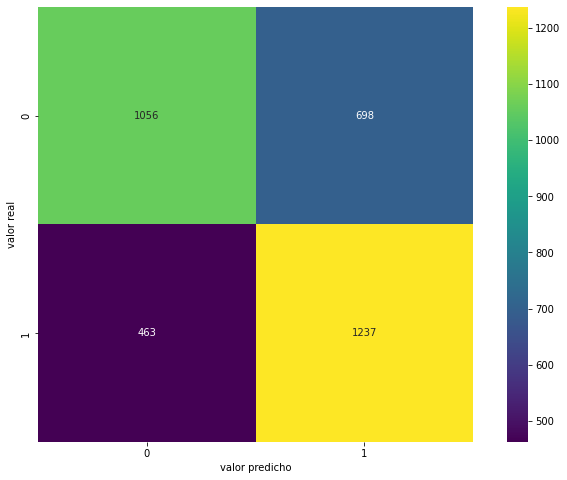

In [824]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [825]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.663868,0.639276,0.727647,0.680605,0.328999,test,Regresión logistica
1,0.661330,0.645027,0.727564,0.683814,0.322045,train,Regresión logistica
